<a href="https://colab.research.google.com/github/a-forty-two/DFEData2/blob/main/004_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install azureml
!pip install azureml-core
!pip install azureml-dataset-runtime


     |████████████████████████████████| 2.2 MB 5.3 MB/s 
     |████████████████████████████████| 3.0 MB 45.6 MB/s 
     |████████████████████████████████| 55 kB 3.2 MB/s 
     |████████████████████████████████| 412 kB 41.0 MB/s 
     |████████████████████████████████| 109 kB 57.8 MB/s 
     |████████████████████████████████| 85 kB 3.2 MB/s 
     |████████████████████████████████| 54 kB 2.5 MB/s 
     |████████████████████████████████| 928 kB 74.2 MB/s 
     |████████████████████████████████| 1.3 MB 72.7 MB/s 
     |████████████████████████████████| 141 kB 59.1 MB/s 
     |████████████████████████████████| 146 kB 57.6 MB/s 
     |████████████████████████████████| 94 kB 2.5 MB/s 
     |████████████████████████████████| 547 kB 54.9 MB/s 
     |████████████████████████████████| 40 kB 4.8 MB/s 
     |████████████████████████████████| 176 kB 58.5 MB/s 
     |████████████████████████████████| 52 kB 1.4 MB/s 
     |████████████████████████████████| 45 kB 3.0 MB/s 
     |███████████████████████

In [2]:
import numpy as np
import pandas as pd
from azureml.core import Workspace, Dataset

subscription_id = '3421760b-dade-4bef-8b43-6e106dec4e27'
resource_group = 'otterishungry'
workspace_name = 'cantthinkofaname'

workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset = Dataset.get_by_name(workspace, name='bca')
df = dataset.to_pandas_dataframe()
df.head()

Performing interactive authentication. Please follow the instructions on the terminal.
To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code FL6KQ283M to authenticate.
You have logged in. Now let us find all the subscriptions to which you have access...


Failed to authenticate to tenant '72f988bf-86f1-41af-91ab-2d7cd011db47' due to error 'Get Token request returned http error: 400 and server response: {"error":"interaction_required","error_description":"AADSTS50076: Due to a configuration change made by your administrator, or because you moved to a new location, you must use multi-factor authentication to access '797f4846-ba00-4fd7-ba43-dac1f8f63013'.\r\nTrace ID: 85d8c840-7a87-4b21-827f-6fa8cda3ce00\r\nCorrelation ID: 10c3424f-540a-4e9d-978f-2d2b6b70aef0\r\nTimestamp: 2021-11-03 11:00:47Z","error_codes":[50076],"timestamp":"2021-11-03 11:00:47Z","trace_id":"85d8c840-7a87-4b21-827f-6fa8cda3ce00","correlation_id":"10c3424f-540a-4e9d-978f-2d2b6b70aef0","error_uri":"https://login.microsoftonline.com/error?code=50076","suberror":"basic_action"}'.Will continue to look for other tenants to find subscriptions to which you have access


Interactive authentication successfully completed.


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
y = df.pop('diagnosis') # REMOVE the label from df and put into y 
x = df
# y = f(x) -> equation for DTree 
from sklearn.model_selection import train_test_split
xtrain,xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)


In [7]:
# Decision Tree, Random Forest -> work on relative comparison -> NORMALIZING or NOT normalizing
# may not cause any diff at all 
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=5)
dtree_light =  DecisionTreeClassifier(max_depth=3)
dtree_deep =  DecisionTreeClassifier(max_depth=7)
dtree.fit(xtrain, ytrain)
dtree_light.fit(xtrain, ytrain)
dtree_deep.fit(xtrain, ytrain)
# WEIGHTS and BIASES, y = Weights * inputs + bias -> MACHINE LEARNING
# Decision TREE doesn't help with calculating the above! 
# it helps finding thresholds within which features take decisions 


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [8]:
pred1 = dtree.predict(xtest)
pred2 = dtree_light.predict(xtest)
pred3 = dtree_deep.predict(xtest)
from sklearn.metrics import accuracy_score
# COMPARING the TREES to each other, not to the actual answer (ytest)
score = accuracy_score(pred1, pred2)
print(score)
score = accuracy_score(pred1, pred3)
print(score)
score = accuracy_score(pred3, pred2)
print(score)
# ACCURACY_SCORE(a, b) = (len(any) - mismatches) / len(any)

0.9824561403508771
0.9824561403508771
0.9824561403508771


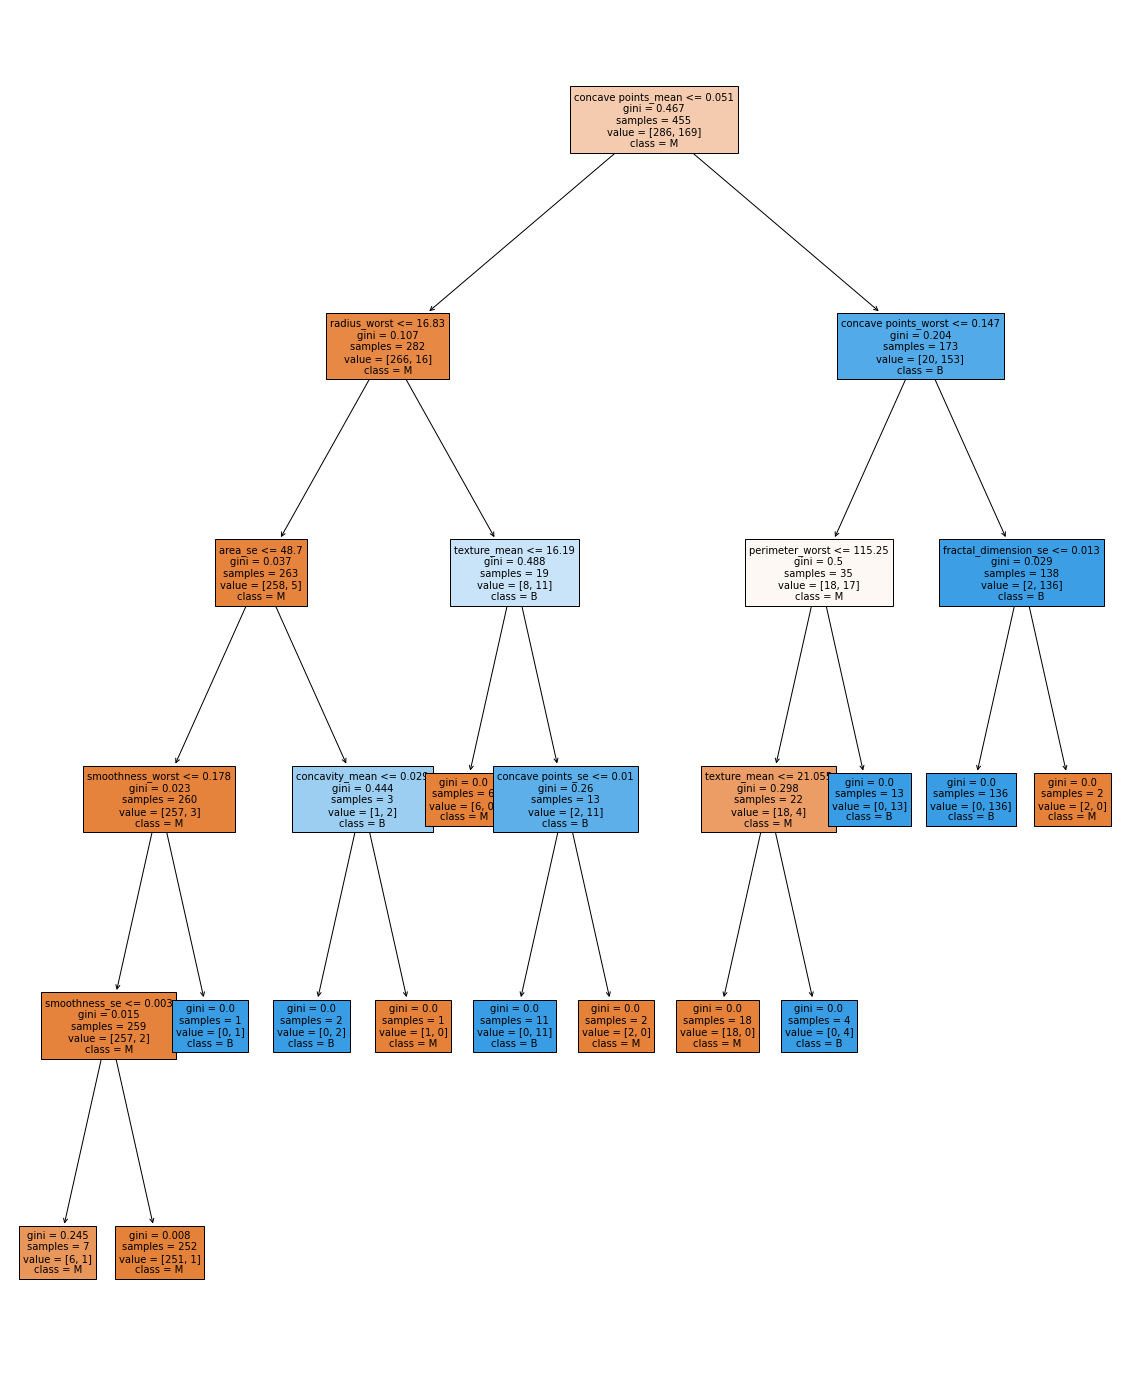

In [6]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,25))
a = plot_tree(dtree_deep, feature_names=x.columns, fontsize=10, filled=True, class_names=['M','B'])
plt.show()
# GINI and ENTROPY 